# Dynamic Simulation of Abnormal Voltage Ride-through and Trip Performance

In [1]:
from opender import DER, DER_PV
import matplotlib.pyplot as plt

In [2]:
# create Category II DER, without momentary cessation.
der_obj = DER_PV()
der_obj.der_file.NP_ABNORMAL_OP_CAT = 'CAT_II'
der_obj.update_der_input(p_dc_pu=0.5, f=60)

In [3]:
# Configure dynamic simulation timestep
t_s = 0.01
DER.t_s = t_s
t = 0

In [4]:
# Prepare arrays for plotting
t_plot = []
v_plot = []
i_plot = []
stat_plot = []

In [5]:
# Simulate for 5s
while t < 5:
    v = 1
    # Between 0.5 to 1s, voltage set to 0.8, DER should enter mandatory operation region
    if 0.5 < t < 1:
        v = 0.8
    # Between 2.5 to 3s, voltage set to 0.5, DER should enter permissive operation region
    if 2.5 < t < 3:
        v = 0.5
    # After 4.5s, voltage set to 0, DER should should cease to energize and trip within 0.16s
    if t > 4.5:
        v = 0

    # Calculate DER output current
    der_obj.update_der_input(v_pu = v)
    der_obj.run()
    I,_ = der_obj.get_der_output('Ipn_pu')

    # save result
    t_plot.append(t)
    v_plot.append(der_obj.der_input.v_meas_pu)
    i_plot.append(abs(I))
    stat_plot.append(der_obj.der_status)

    # increase t
    t = t + t_s

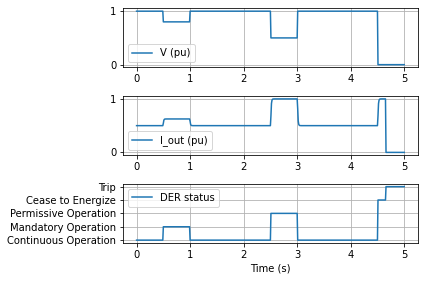

In [6]:
# plot figure
fig = plt.figure()
plt.clf()
ax1=plt.subplot(3, 1, 1)
plt.plot(t_plot, v_plot, label='V (pu)')
plt.grid()
plt.legend()
plt.subplot(3, 1, 2, sharex=ax1)
plt.plot(t_plot, i_plot, label='I_out (pu)')
plt.grid()
plt.legend()
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_plot, stat_plot, label='DER status')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

For this Category II DER,
* when voltage is at 0.8pu, DER enters mandatory operation
* when voltage is at 0.5pu, DER enters permissive operation
* when voltage is at 0pu, DER enters cease to energize, and trips in 0.16s